# Examen Data Science & AI

| | |
| :--- | :--- |
| **Examenreeks** | Voorbeeldexamen |
| **Student:** | VUL HIER JE NAAM IN |
| **Studentennummer:** | VUL HIER JE STUDENTENNUMMER IN |
| **Datum & uur:** | EXAMENDATUM, STARTUUR |
| **Klasgroep:** | VUL HIER JE KLASGROEP IN |
| **IOEM-student:** | NEE |

Add code cells where necessary to work out the questions.  
**Please note that the contents of the code blocks are not considered as answers! Only what you write in the Markdown cells provided, counts as an answer! The contents of the code blocks only serve to substantiate your answer, so that we can see what you did to get your answer should it not match the expected outcome.

!! The exam will be in dutch for all students not enrolled in the IC !!

In [2]:
# Importeren van de nodige packages
# Vul zelf aan met extra packages als dit nodig is voor de oefeningen!
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Enkel relevant voor Google Colab:
# Als je VS Code gebruikt, kan je deze cel verwijderen of in commentaar zetten.
from google.colab import drive
drive.mount('/content/gdrive')

## Question 1

Look at the figure below with a scatter diagram. What do you estimate the value of $R$ (Pearson product-correlation coefficient) will be?

- Close to -1
- Close to -0.5
- Close to 0
- Close to 1

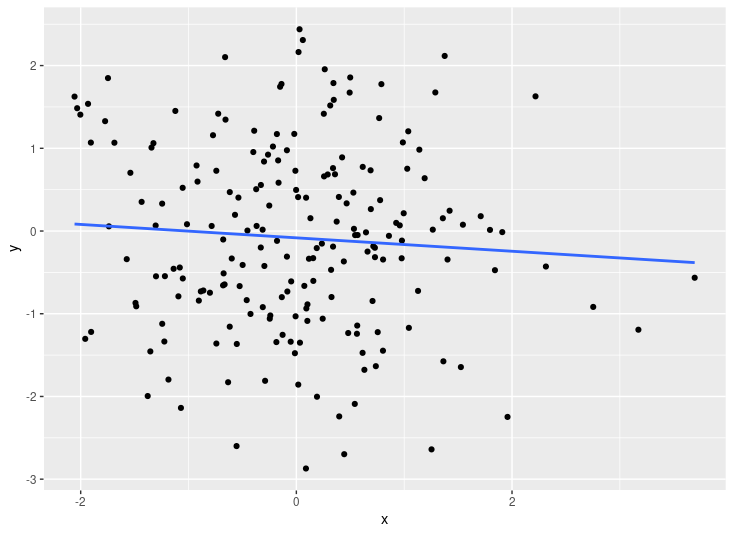

## Answer Question 1


Close to 0, because the data is more centered around the center of the plot.

## Question 2

For a survey in a school with 100 boys and 100 girls, the following method is used to form a sample:

- All boys and girls are sorted into two rows according to their height
- A coin is tossed
    - With cross, the first boy from the boys' row is chosen
    - At coin, the first girl is chosen from the girls' row.
- This is repeated until 10 pupils are selected.

<hr/>

1. Is this a random sample? Explain.
2. What type of error is being made here?
3. Is this a good sample? Explain.

## Answers Question 2

1. This is not a random sample, because only the smallest boys or girls have a chance to be selected. Since they are ordered using the height of the students.
2. Systematic Sampling Error, because of the way the data is collected.
3. No, not all students have an equal chance of being selected, for example the students from the final year have almost no chance, because they are the tallest.

## Question 3

In a basket are seven fruits, 4 oranges and 3 lemons. You take ...

(1) just one fruit. What is the probability that this is an orange?  
(2) one fruit and then another without putting the first one back. What is the probability that the two fruits taken are both oranges?  
(3) two fruits, one after one and without putting it back. What is the probability that the second fruit is an orange?  
(4) a first fruit, without looking! Then take another one from the basket without putting the first one back. This second fruit is an orange. Now what is the probability that the first fruit is an orange?

## Answers Question 3

1. $\frac{4}{7}$
2. $\frac{4}{7} \cdot \frac{3}{6} = \frac{2}{7}$
3. $\frac{4}{7} \cdot \frac{3}{6} + \frac{3}{7} \cdot \frac{4}{6} = \frac{4}{7}$
4. $\frac{2}{7} \cdot \frac{4}{7} = \frac{2}{7}$

## Question 4

The diameter of pistons produced in a factory are _D_ cm where _D_ ~ Nor(13.4, 0.12)

(1) The tolerance specified for the pistons is that the diameter needs to be at least 13.35 cm and not more than 13.5 cm. What proportion of the production in the factory meets these tolerance limits?  
(2) Three pistons are chosen at random. What is the probability that none of them meet the tolerance limits  
(3) A sample of 20 pistons is taken at random. The mean value for the diameter is found to be 13.43 cm. Test at the 5% significance level whether any modifications have been made to the machine producing the pistons.


Hypothesis:

-   $H_0$: $\mu$ = 13.4
-   $H_1$: $\mu$ > 13.4

In [3]:
# Properties of the sample:
n = 20          # sample size
sm =13.43       # sample mean
s = 0.12        # sample standard deviation (assumed to be known)
a = 0.05        # significance level (chosen by the researcher)
m0 = 13.4       # hypothetical population mean (H0)

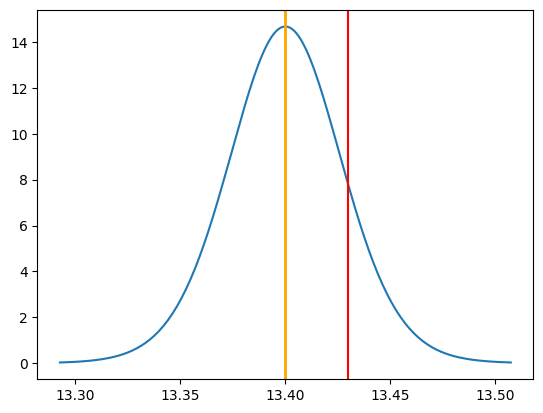

In [4]:
# Plotting the sample distribution
# Gauss-curve plot:
# X-values
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.t.pdf(dist_x, loc = m0,scale = s/np.sqrt(n), df = n-1)
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(m0, color="orange", lw=2)
# Show the sample mean with a red line
dplot.axvline(sm, color="red")

In [5]:
p = stats.t.sf(sm, loc=m0, scale=s/np.sqrt(n), df=n-1)
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

p-value: 0.13875
p > a: do not reject H0


## Answers Question 4

We can conclude that if we assume that $H_0$ is true, the he probability to draw a sample from this population with this particular value for  $\bar{x}$  is relatively big.
With the chosen significance level, we do not reject the hypothesis.

## Question 5

Suppose we have a dataset containing log data from a web server. Each row contains information from an HTTP request sent to the server, including the following information:

1. Timestamp of the HTTP request (in Unix time, number of seconds since 1970-01-01)
2. The type of HTTP request (GET, PUT, HEAD, DELETE, ...)
3. Response time (in ms)
4. The status of the response (2xx, 4xx, 5xx, ...)

What is the measurement level of each of these variables?

## Answers Question 5

1. Interval
2. Nominal
3. Ratio
4. Nominal

## Question 6

The sample given below contains measurement results of a variable Temperature at two time points (`time1` and `time2`). We want to know whether the measurements at the second time point are significantly different from those at the first time point.

Use an appropriate statistical test (with significance level 5%) to verify this statement.

1. Visualise the data with an appropriate plot. What can you infer about the research question? Explain.
2. What statistical test should you use to answer this research question? Be as specific as possible!
3. Formulate the null hypothesis and the alternative hypothesis.
4. Calculate the p-value.
5. Draw a conclusion based on the previous step and formulate an answer to the research question.
6. Give for the observations at time `time1`:
    1. The interquartile range
    2. The kurtosis
    3. The range
    4. The standard deviation

In [6]:
temperatures = pd.DataFrame(data={
  'time1': [65, 87, 59, 71, 58, 74, 55, 98, 62, 53, 84, 63, 78, 62, 60],
  'time2': [82, 91, 86, 83, 85, 51, 65, 61, 76, 65, 53, 70, 51, 55, 68]
})

## Answers Question 6


1. Listed below
2. The t-test for paired samples (paired t-test)
3. Hypothesis:
   -   $H_0$: The temperature in both groups is the same.
   -   $H_1$: The temperature in both groups is not the same.
4. 0.43720
5. There is not enough evidence to reject $H_0$
6. 
   1. 16.50
   2. 0.16
   3. 45.00
   4. 13.09744

<Axes: >

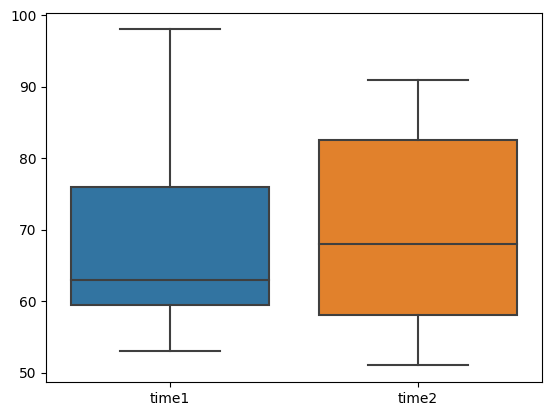

In [7]:
sns.boxplot(data=temperatures)

hypothesis:

-   $H_0$: The temperature in both groups is the same.
-   $H_1$: The temperature in both groups is not the same.

In [19]:
time1 = temperatures['time1']
time2 = temperatures['time2']

a = 0.05

statistic, p = stats.ttest_rel(time1, time2, alternative='less')

print(f"p-value: {p:.5f}")
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

print(f"Interquartile interval: {time1.quantile(0.75) - time1.quantile(0.25):.2f}")
print(f"Range: {time1.max() - time1.min():.2f}")
print(f"Kurtosis: {time1.kurtosis():.2f}")
print(f"Standard deviation: {time1.std():.5f}")

p-value: 0.43720
p > a: do not reject H0
Interquartile interval: 16.50
Range: 45.00
Kurtosis: 0.16
Standard deviation: 13.09744


## Question 7

The figure below shows a graph of a time series.  The observations are plotted in black with a solid line. In addition, three forms of moving average are plotted.

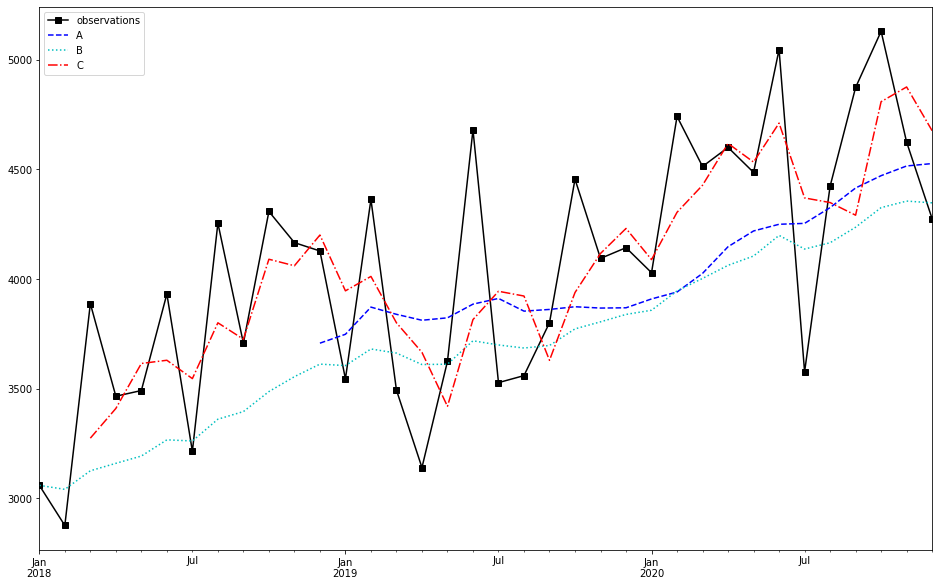

For each (A, B, C), indicate exactly what form of moving average is involved. Choose from the options given below:

- Simple moving average with period 3
- Simple moving average with period 12
- Simple exponential smoothing with $alpha = 0.1$
- Simple exponential smoothing with $alpha = 0.9$

If you had to set up a model for this time series based on exponential smoothing, which one would you use? Explain shortly your answer.

## Answers question 7

1. A (purple, - - - -): Simple moving average with period 12
2. B (cyan, ....): Simple exponential smoothing with $alpha = 0.1$
3. C (red, - . - .): Simple moving average with period 3
4. The most appropriate form of exponential smoothing is the exponential smoothing with $alpha = 0.1$ because the time series is very noisy and the exponential smoothing with $alpha = 0.1$ is the most robust for noisy time series.


## Question 8 

Given last year's mileage and maintenance costs of 23 trucks.

(1) Make the plot below (In the Answers, give the command for this plot) 

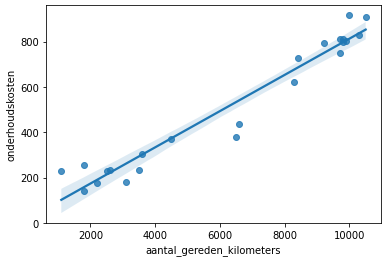

(2) Give the equation of the line   
(3) Calculate the correlation coefficient (symbol + value)  
(4) Formulate an interpretation for the value of the correlation coefficient  
(5) Approximately how much will be the maintenance cost of a truck driving 5000 kilometres.  
(6) What will be the approximate fixed cost of a truck even if it has not driven a single kilometre?  



In [20]:
sample_data = pd.DataFrame(data = {
    'mileage': [10500, 9700, 9200, 8300, 6500, 4500, 3500, 2200, 1800, 9800, 6600, 3600, 2500, 3100, 8400, 9700, 1800, 10000, 9800, 9900, 1100, 2600, 10300],
    'maintenance costs': [908.56, 751.12, 793.55, 619.61, 380.11, 368.72, 235.32, 174.93, 256.30, 799.58, 436.04, 304.25, 226.81, 179.68, 726.65, 810.53, 142.53, 915.53, 812.45, 803.78, 227.32, 231.46, 829.21]})

<Axes: xlabel='mileage', ylabel='maintenance costs'>

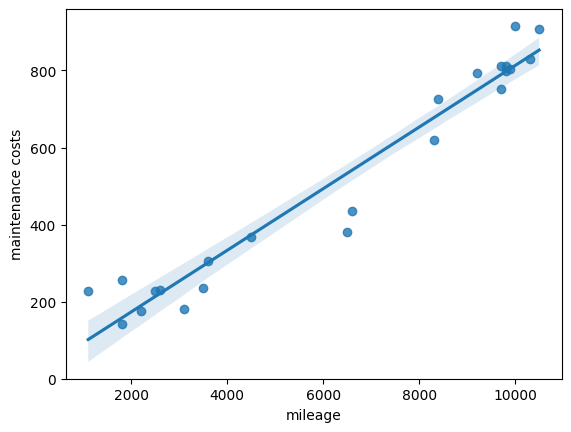

In [35]:
sns.regplot(data=sample_data, x='mileage', y='maintenance costs')

In [28]:
from sklearn.linear_model import LinearRegression

x = sample_data.mileage.values.reshape(-1, 1)
y = sample_data['maintenance costs']

model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {model.intercept_:.2f} + {model.coef_[0]:.2f} x")

cor = np.corrcoef(sample_data.mileage, sample_data['maintenance costs'])[0, 1]
print(f"R = {cor:.4f}")
print(f"R² = {cor**2:.4f}")

print(f"The approximate cost of the truck with a mileage of 5000 km is: {model.predict([[5000]])[0]:.2f} euro")

print(f"The approximate cost of the truck with not a single km driven is: {model.predict([[0]])[0]:.2f} euro")

Regression line: ŷ = 13.77 + 0.08 x
R = 0.9735
R² = 0.9477
The approximate cost of the truck with a mileage of 5000 km is: 413.27 euro
The approximate cost of the truck with not a single km driven is: 13.77 euro


## Answers Question 8


1. See graph above
2. ŷ = 13.77 + 0.08 x
3. R = 0.9735
4. The approximate cost of the truck with a mileage of 5000 km is: 413.27 euro.
5. The approximate cost of the truck with not a single km driven is: 13.77 euro.


## Question 9

You recently offered samples of three products to every customer who entered your business. You then asked which product customers liked best. You recorded these preferences for Product A, Product B and Product C in the dataset given below.

Do customers have a distinct preference for any of these products? Use an appropriate statistical test (with significance level 5%) to verify this statement.

1. Visualise the data with an appropriate plot. What can you infer about the research question? Explain.
2. What hypothesis test will you apply to answer this research question? Be as specific as possible!
3. Formulate the null hypothesis and the alternative hypothesis
4. Calculate the appropriate test statistic (test statistic) for this test. Give the symbol and value
5. Calculate the p-value
6. Draw a conclusion based on the previous step and formulate an answer to the research question.

In [36]:
products = pd.DataFrame(data={'Choice': [
  "Product A","Product A","Product B","Product B","Product C",
  "Product B","Product B","Product B","Product C","Product B",
  "Product C","Product A","Product C","Product B","Product C",
  "Product B","Product C","Product C","Product C","Product B",
  "Product C","Product C","Product B","Product C","Product B",
  "Product B","Product B","Product B","Product A","Product B",
  "Product B","Product B","Product B","Product B","Product C",
  "Product C","Product B","Product C","Product C","Product A",
  "Product C","Product C","Product B","Product B","Product B",
  "Product B","Product C","Product C","Product C","Product C",
  "Product C","Product B","Product A","Product C","Product C",
  "Product B","Product B","Product C","Product C","Product C",
  "Product B","Product C","Product B","Product B","Product C",
  "Product B","Product B","Product C","Product C","Product B",
  "Product C","Product C","Product C","Product B","Product B",
  "Product C","Product C","Product C","Product C","Product C",
  "Product C","Product C","Product C","Product C","Product C",
  "Product C","Product C","Product C","Product C","Product B"
]})

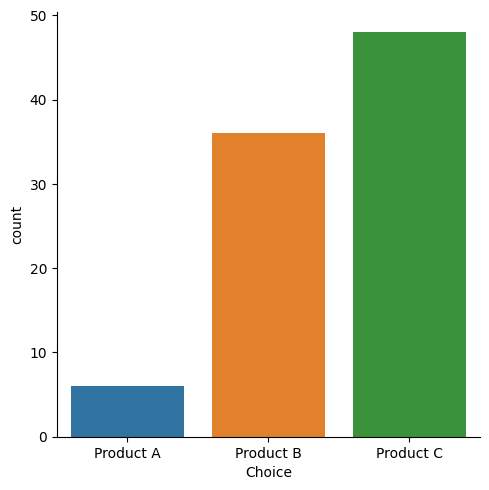

In [37]:
sns.catplot(x="Choice", kind="count", data=products)

In [41]:
product_types = products['Choice'].unique()
extra = products.groupby('Choice')['Choice'].count()

observed = np.array(extra)
expected_p = np.array([1/3,1/3,1/3])

alpha = 0.05               # Significance level
n = sum(observed)          # Sample size
k = len(observed)          # Number of categories
dof = k - 1                # Degrees of freedom
expected = expected_p * n  # Expected absolute frequencies in the sample
g = stats.chi2.isf(alpha, df=dof)  # Critical value

# Goodness-of-fit-test in Python:
chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)

print("Significance level  ⍺ = %.2f" % alpha)
print("Sample size         n = %d" % n)
print("k = %d; df = %d" % (k, dof))
print("Chi-squared        χ² = %.4f" % chi2)
print("Critical value      g = %.4f" % g)
print("p-value             p = %.4f" % p)

Significance level  ⍺ = 0.05
Sample size         n = 90
k = 3; df = 2
Chi-squared        χ² = 31.2000
Critical value      g = 5.9915
p-value             p = 0.0000


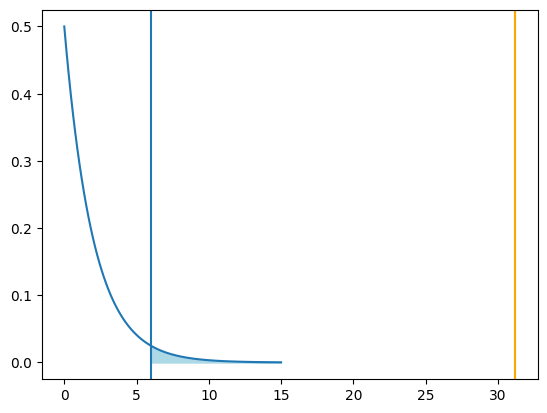

In [42]:
# Plot of the case:
# x-values:
x = np.linspace(0, 15, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=dof)
# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(alpha, df=dof)

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange')  # chi-squared

## Answers Question 9


1. Customers have a strong interest product c and b, but definitely not in a.
2. Goodness of fit, to check whether there is a normal distribution between the three products.
3. Hypotesis:
    -   $H_0$: Customers do not have a specific preference for a particular product.
    -   $H_1$: Customers do have a specific preference for a particular product.
4. Results:
    -   Significance level  ⍺ = 0.05
    -   Sample size         n = 90
    -   k = 3; df = 2
    -   Chi-squared        χ² = 31.2000
    -   Critical value      g = 5.9915
5. p-value: 0 (_Is this even correct?_)
6. χ² is bigger than the critical value, therefore we should reject the hypothesis. This is also confirmed by the $p$-value which is smaller than $\alpha$.